### <h1>Diabetes Patient Health Data</h1> ###

This dataset, sourced from the National Institute of Diabetes and Digestive and Kidney Diseases, is designed to aid in predicting diabetes diagnoses based on various health measurements. The dataset focuses on a specific subset of patients—female Pima Indians aged 21 and older. It includes a range of diagnostic measurements that provide a comprehensive view of the patients' health profiles, making it an invaluable resource for medical research and machine learning applications aimed at diagnosing diabetes.

### <h3> Learners are expected to review the problem statement carefully and insert their code between the markers "# Learners code starts and end". Please do not modify the provided template, as it is being used for tools assessment.</h3> ###



<h2> Data Dictionary </h2>

| **Column Name**	| **Description** |
|---------------|-------------|
| Pregnancies | Number of times the patient has been pregnant |
| Glucose | Plasma glucose concentration measured 2 hours after a glucose tolerance test |
| BloodPressure | Diastolic blood pressure (mm Hg) |
| SkinThickness	| Triceps skinfold thickness (mm) |
| Insulin |	2-Hour serum insulin (mu U/ml) |
| BMI | Body Mass Index (weight in kg divided by square of height in meters) |
| DiabetesPedigreeFunction |	A function that scores likelihood of diabetes based on family history |
| Age	| Age of the patient in years |
| Outcome |	Class variable (0: Non-diabetic, 1: Diabetic) |



<h3>  Import various libraries and modules used in data analysis</h3>

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

<h1> Task Load the dataset and perform preliminary EDA with key observations and insights- (weightage - 30 marks) </h1>

<h3> Task-1. Load Dataset (weightage - 2 marks)</h3>

In [13]:
def read_csv():
    #Learners code starts
    path = '/Users/rakeshdevarakonda/Documents/Auto_Eval/python3/diabetes.csv'
    df = pd.read_csv(path)
    #Learners code ends 
    return df
df = read_csv()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<h3> Task-2. Display Basic Dataset Information (weightage - 3 marks) </h3>

In [14]:
# 1. Display basic information about the dataset
def display_dataset_info(df):
#Learners code starts    
    return df.info()
#Learners code ends
# Display dataset information
display_dataset_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<h3>Task-3. Check for Missing Values (weightage - 5 marks) </h3>

In [15]:
# 2. Check for missing values
def check_missing_values(df):
    #Learners code starts
    return df.isnull().sum()
    #Learners code ends
# Check for missing values
check_missing_values(df)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<h3>Task-4  Compute Basic Statistics (weightage - 5 marks)</h3>

In [16]:
def compute_basic_statistics(df):
       #Learners code starts
       return df.describe()
       #Learners code ends
# Compute basic statistics
compute_basic_statistics(df)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<h3>Task-5 Plot Histograms for Each Feature (weightage - 5 marks)</h3>

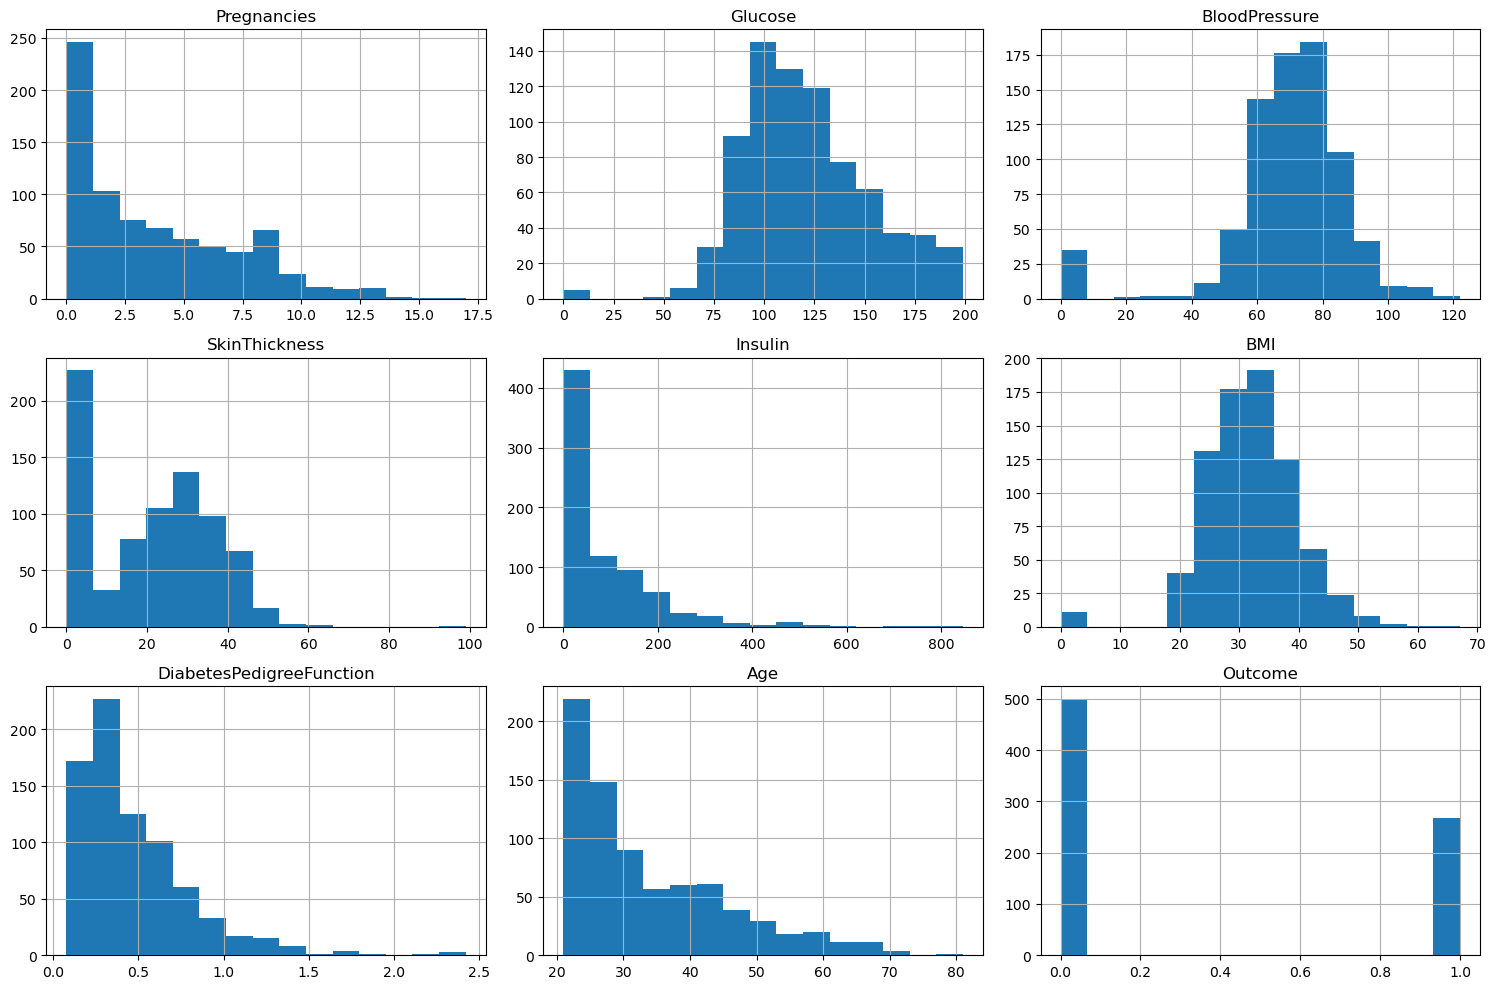

In [17]:
# 4. Plot histograms for each feature
def plot_histograms(df):
    #df.drop(['Pregnancies'], axis=1)
   #Learners code starts
    df.hist(bins=15, figsize=(15, 10))
    plt.tight_layout()
    plt.show()
    #Learners code ends
# Plot histograms
plot_histograms(df)

<h3>Task-6 Plot Correlation Heatmap(weightage - 5 marks)</h3>

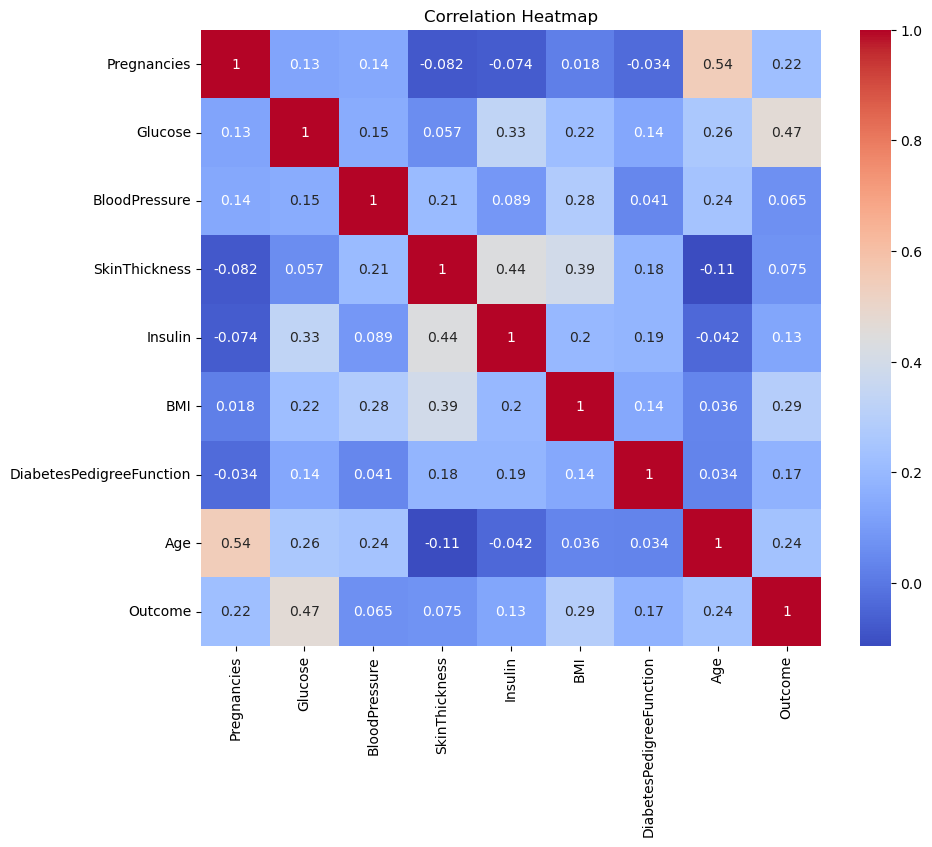

In [12]:
# 5. Plot correlation heatmap
def plot_correlation_heatmap(df):
    #Learners code starts
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.title("Correlation Heatmap")
    plt.show()
    #Learners code ends
# Plot correlation heatmap
plot_correlation_heatmap(df)

<h3>Task-7 Plot Count of Diabetes Outcomes(weightage - 5 marks)</h3>

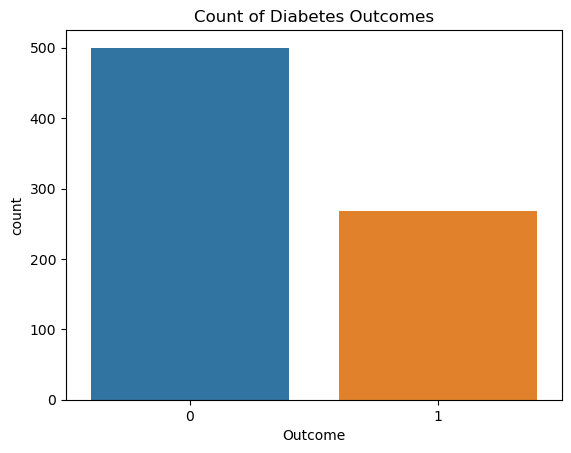

In [13]:
# 6. Plot count of diabetes outcomes
def plot_outcome_counts(df):
    #Learners code starts
    sns.countplot(x='Outcome', data=df)
    plt.title("Count of Diabetes Outcomes")
    plt.show()
    #Learners code ends
# Plot outcome counts
plot_outcome_counts(df)